## Decision Tree Classification

The decision tree algorithm is a supervised learning algorithm. The algorithm uses a data structure called a tree to predict the outcome of a particular problem.
 
Decision tree classification presents a flow-chart tree structure. The root node on the top of the tree contains attributes(features) that partition the dataset, and the leaf node at the bottom presents outcomes that are partitioned by levels of decision nodes in the middle. The dataset is split into training and testing sets. The training set is used to learn how decisions are made, and the testing set is used to predict the decisions and see if it's accurate.
 
Advantages of applying a decision tree on a dataset:
1. easy access and classification for complicated and volume datasets.
2. prioritize features with greater importance to optimize model output.
3. adjustable tree depth offers a customized result based on the user's demand.
4. decision tree visualization is easy to interpret for non-technical purposes.

This dataset contains individual information about users' music habits, mental health statistics, and how music affects one's mental health. Attributes are age, hours per day, anxiety, Depression, insomnia, OCD, and music effects. My goal is to predict new users' music effects based on other information.

Reference:
- ANLY 501 shared/Random Classifier
- ANLY 501 Lab 4.1
- https://towardsdatascience.com/an-exhaustive-guide-to-classification-using-decision-trees-8d472e77223f


In [2]:
import random
from collections import Counter
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import io
import pydotplus

df = pd.read_csv('../../data/cleaned data/Music Survey Cleaned.csv')
df = df.drop(['Unnamed: 0','Primary streaming service'],axis=1)


#### Random Classifier

In [2]:
def generate_label_data(class_labels, weights,N=1000):

    y=random.choices(class_labels, weights = weights, k = N)
    print("-----GENERATING DATA-----")
    print("unique entries:",Counter(y).keys())  
    print("count of labels:",Counter(y).values()) # counts the elements' frequency
    print("probability of labels:",np.fromiter(Counter(y).values(), dtype=float)/len(y)) # counts the elements' frequency
    return y

y=generate_label_data([0,1],[0.8,0.2],1000)

def random_classifier(y_data):
    ypred=[];
    max_label=np.max(y_data); #print(max_label)
    for i in range(0,len(y_data)):
        ypred.append(int(np.floor((max_label+1)*np.random.uniform(0,1))))

    print("-----RANDOM CLASSIFIER-----")
    print("count of prediction:",Counter(ypred).values()) # counts the elements' frequency
    print("probability of prediction:",np.fromiter(Counter(ypred).values(), dtype=float)/len(y_data)) # counts the elements' frequency
    print("accuracy",accuracy_score(y_data, ypred))
    print("percision, recall, fscore,",precision_recall_fscore_support(y_data, ypred))

print("\nBINARY CLASS: UNIFORM LOAD")
y=generate_label_data([0,1],[0.5,0.5],1000)
random_classifier(y)

print("\nBINARY CLASS: NON UNIFORM LOAD")
y=generate_label_data([0,1],[0.1,0.9],1000)
random_classifier(y)

print("\nMULTI-CLASS:  UNIFORM LOAD")
y=generate_label_data([0,1,2,3,4],[0.2,0.2,0.2,0.2,0.2],1000)
random_classifier(y)

print("\nMULTI-CLASS:  NON-UNIFORM LOAD")
y=generate_label_data([0,1,2,3,4],[0.5,0.1,0.2,0.1,0.1],1000)
random_classifier(y)

-----GENERATING DATA-----
unique entries: dict_keys([0, 1])
count of labels: dict_values([806, 194])
probability of labels: [0.806 0.194]

BINARY CLASS: UNIFORM LOAD
-----GENERATING DATA-----
unique entries: dict_keys([0, 1])
count of labels: dict_values([487, 513])
probability of labels: [0.487 0.513]
-----RANDOM CLASSIFIER-----
count of prediction: dict_values([486, 514])
probability of prediction: [0.486 0.514]
accuracy 0.491
percision, recall, fscore, (array([0.47859922, 0.50411523]), array([0.50513347, 0.47758285]), array([0.49150849, 0.49049049]), array([487, 513]))

BINARY CLASS: NON UNIFORM LOAD
-----GENERATING DATA-----
unique entries: dict_keys([0, 1])
count of labels: dict_values([109, 891])
probability of labels: [0.109 0.891]
-----RANDOM CLASSIFIER-----
count of prediction: dict_values([496, 504])
probability of prediction: [0.496 0.504]
accuracy 0.493
percision, recall, fscore, (array([0.10515873, 0.88709677]), array([0.48623853, 0.49382716]), array([0.17292007, 0.6344628

#### Classify Music Survey Dataset

In [3]:
df

Age  Hours per day  Anxiety  Depression  Insomnia  OCD Music effects
0    18.0            4.0      7.0         7.0      10.0  2.0     No effect
1    61.0            2.5      9.0         7.0       3.0  3.0       Improve
2    18.0            4.0      7.0         2.0       5.0  9.0       Improve
3    18.0            5.0      8.0         8.0       7.0  7.0       Improve
4    18.0            3.0      4.0         8.0       6.0  0.0       Improve
..    ...            ...      ...         ...       ...  ...           ...
721  17.0            2.0      7.0         6.0       0.0  9.0       Improve
722  18.0            1.0      3.0         2.0       2.0  5.0       Improve
723  19.0            6.0      2.0         2.0       2.0  2.0       Improve
724  19.0            5.0      2.0         3.0       2.0  1.0       Improve
725  29.0            2.0      2.0         2.0       2.0  5.0       Improve

[726 rows x 7 columns]

In [4]:
#data cleaning
df = df.replace({'No effect':'0','Improve':'1','Worsen':'-1'})
df['Music effects'] = pd.to_numeric(df['Music effects']).astype('float')

#only rows where music effects = 0 or 1
df.drop(df.index[df['Music effects'] == -1], inplace = True)


In [5]:
#dataset structure
print('Dataframe shape:',df.shape)
print('------------------------')
print('Dataframe column names:',df.columns)
print('------------------------')
print('Dataframe overview:',df.describe())
print('------------------------')
load_balance = pd.DataFrame([df['Music effects'].value_counts(sort = True).to_list(), df['Music effects'].value_counts(sort = True,normalize = True).to_list()],index = ['count','percentage'],columns = ['1','0']).T
print('Target variables percentages:',load_balance)

Dataframe shape: (709, 7)
------------------------
Dataframe column names: Index(['Age', 'Hours per day', 'Anxiety', 'Depression', 'Insomnia', 'OCD',
       'Music effects'],
      dtype='object')
------------------------
Dataframe overview:               Age  Hours per day     Anxiety  Depression    Insomnia  \
count  709.000000     709.000000  709.000000  709.000000  709.000000   
mean    25.208745       3.610085    5.818759    4.744711    3.729901   
std     12.002772       3.045441    2.788435    3.002422    3.096272   
min     10.000000       0.000000    0.000000    0.000000    0.000000   
25%     18.000000       2.000000    4.000000    2.000000    1.000000   
50%     21.000000       3.000000    6.000000    5.000000    3.000000   
75%     28.000000       5.000000    8.000000    7.000000    6.000000   
max     89.000000      24.000000   10.000000   10.000000   10.000000   

              OCD  Music effects  
count  709.000000     709.000000  
mean     2.622003       0.761636  
std 

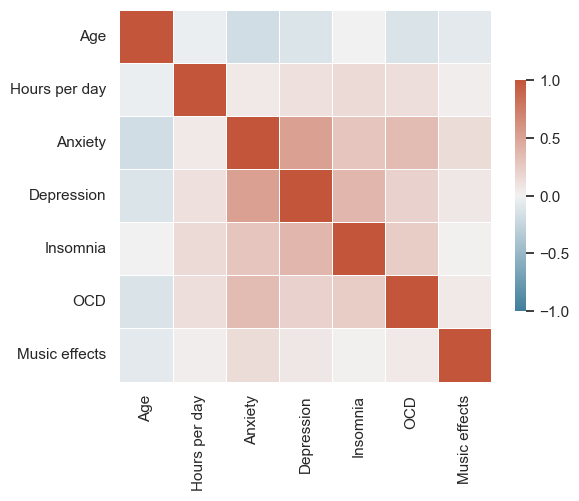

In [6]:
#data visualization correlation matrix
corr = df.corr()
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr,  cmap=cmap, vmin=-1, vmax=1, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

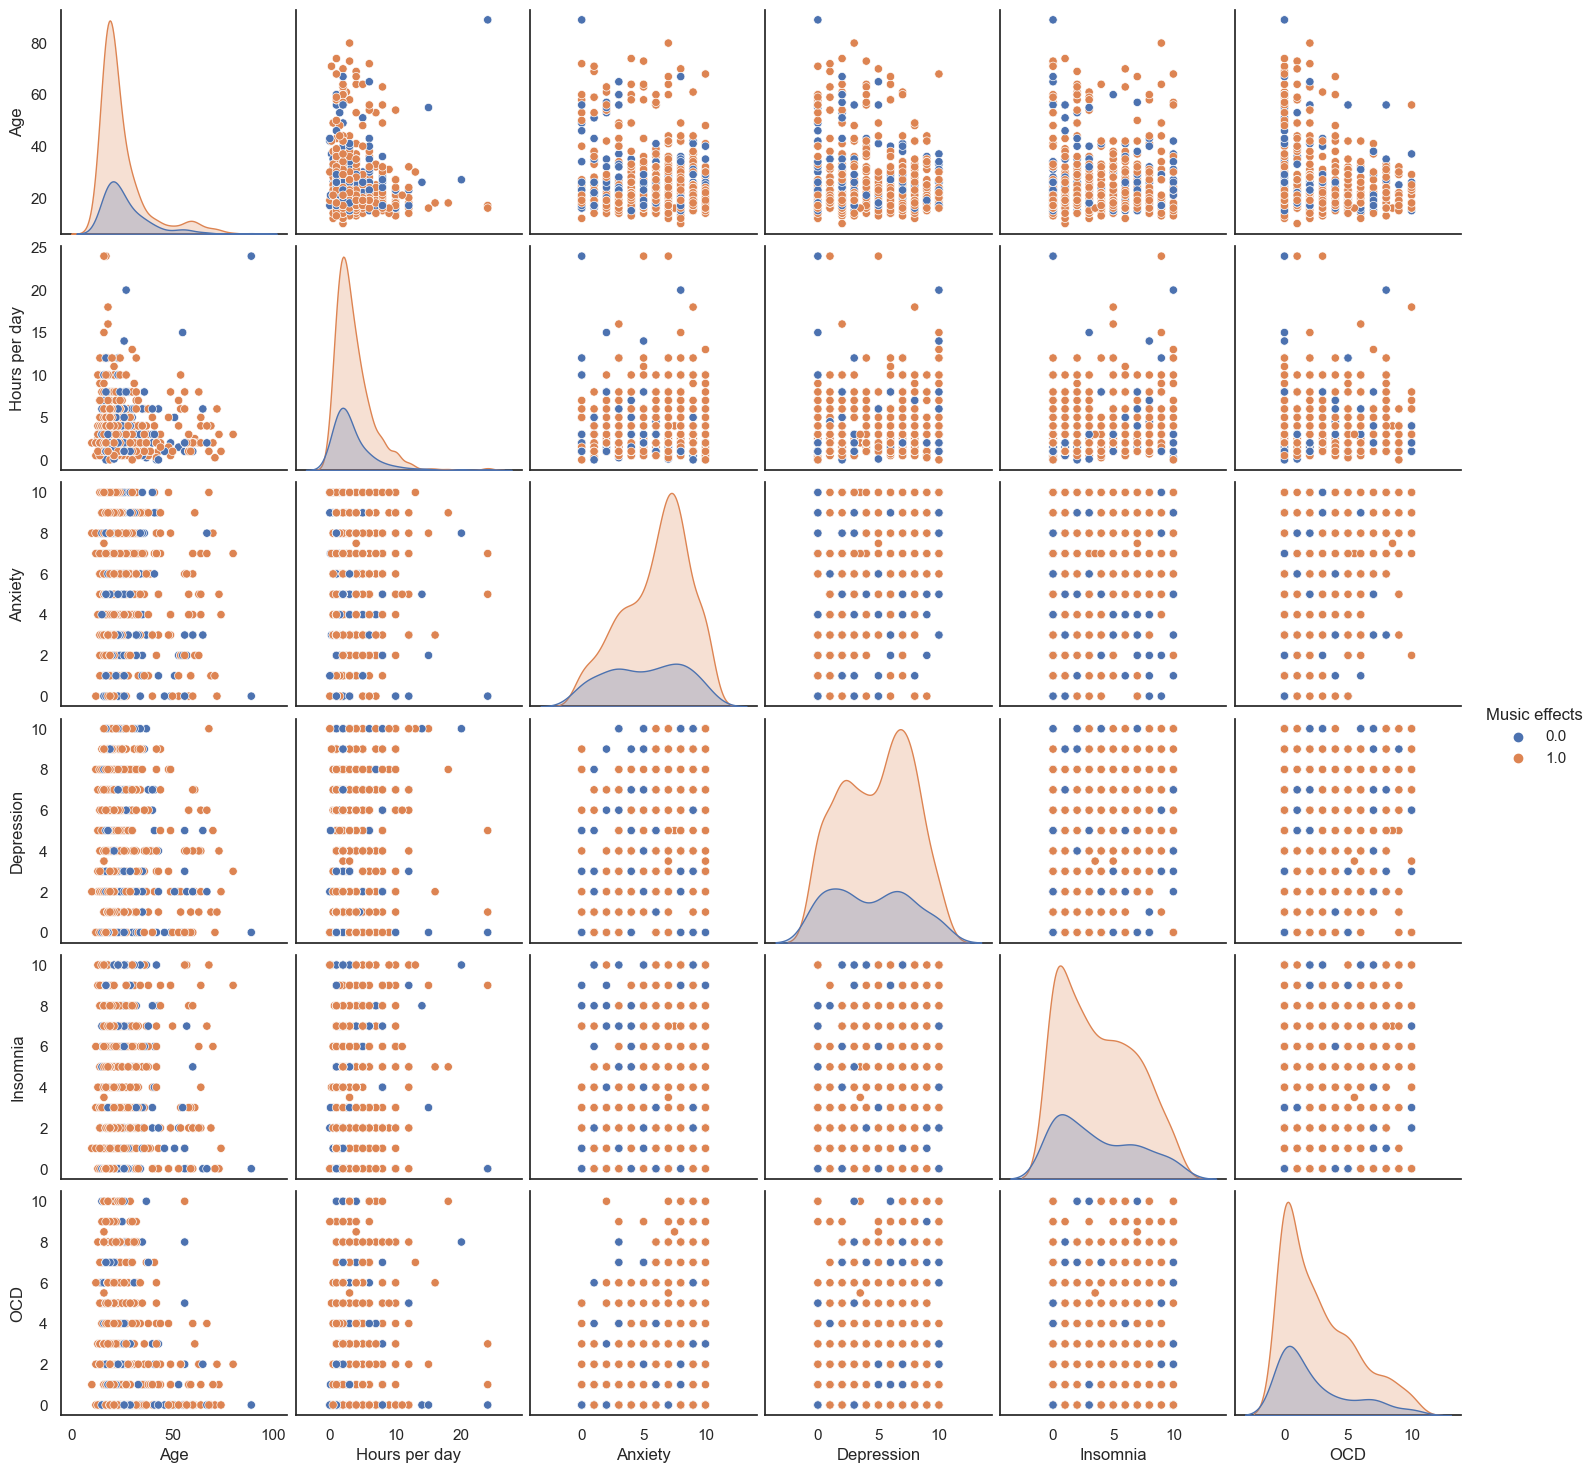

In [7]:
# data visualization - pairplot
sns.pairplot(data=df, hue='Music effects')
plt.show()

In [8]:
#split dataset in features and target variable
#x = feature variables
#y = target variable

x = df.drop('Music effects', axis = 1)
y = df['Music effects']

In [9]:
#split dataset into training set and testing set
#training set for learning
#testing set for predicting
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size =0.2, random_state =42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(567, 6)
(142, 6)
(567,)
(142,)


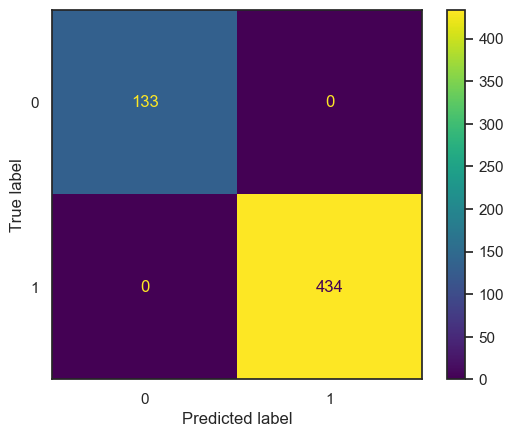

In [10]:
#building decision tree model
model = DecisionTreeClassifier()
model = model.fit(x_train, y_train)

yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

cm_train = confusion_matrix(y_train, yp_train,labels=model.classes_)
cm_test = confusion_matrix(y_test, yp_test,labels=model.classes_)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot()

In [11]:
#model accuracy: how often does the model classify correctly
print("accuracy",accuracy_score(y_test, yp_test))
#poor accuracy score

accuracy 0.6056338028169014


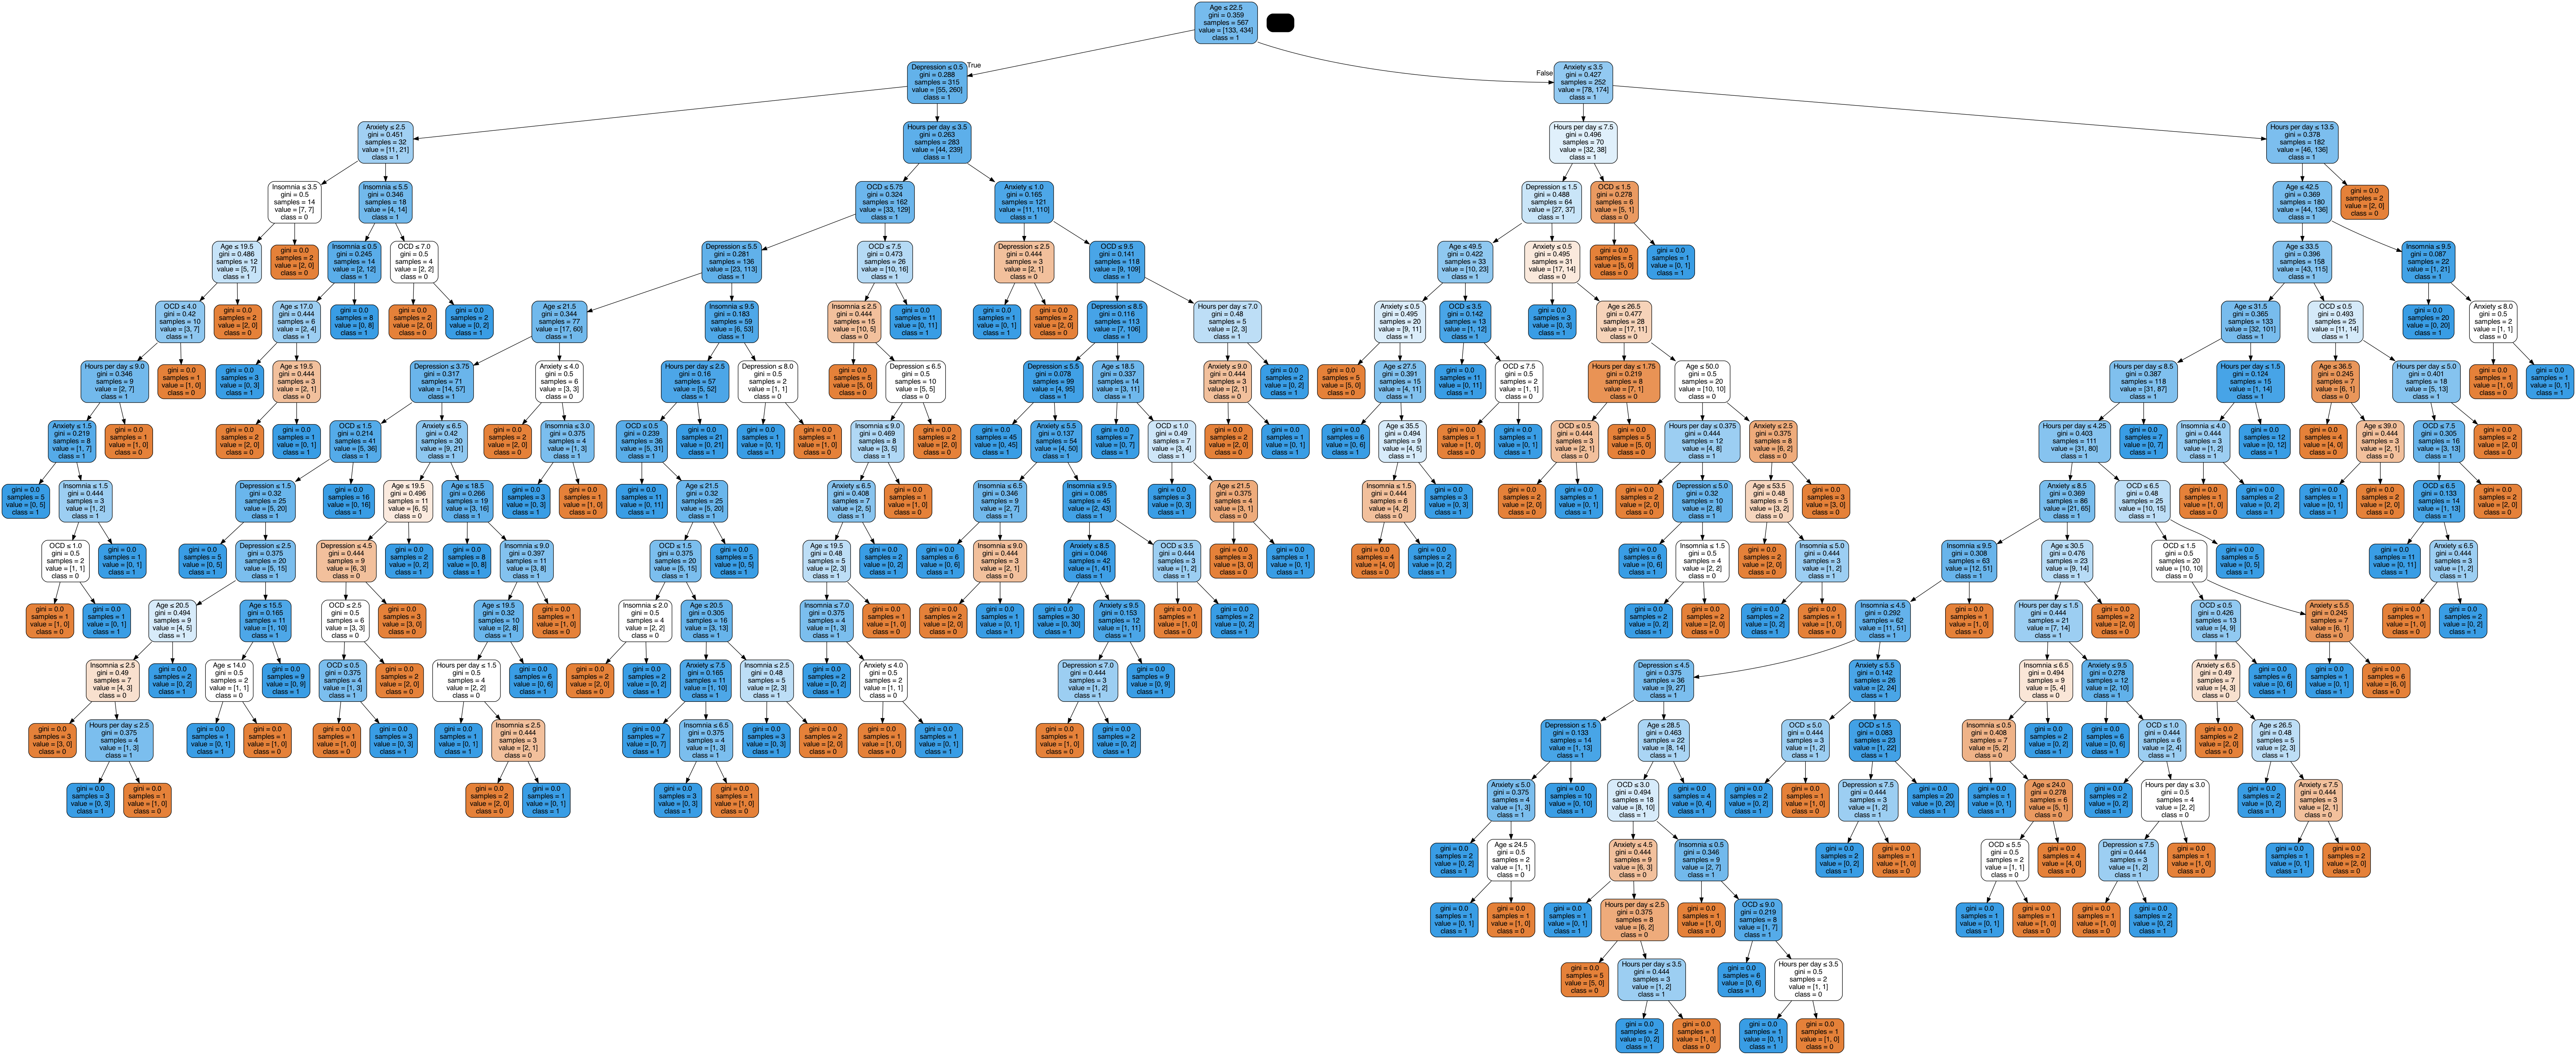

In [30]:
#decision tree visualization
dot_data = io.StringIO()
tree.export_graphviz(model, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = x.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('music effect.png')
Image(graph.create_png())
#tree has too many nodes, not easy to understand, need to be optimized

#### Optimizing Decision Tree

In [31]:
#build optimized decision tree

model_op = DecisionTreeClassifier(criterion="entropy",max_depth=5)
#setting maximum depth to 5

model_op = model_op.fit(x_train, y_train)
yp_train = model_op.predict(x_train)
yp_test = model_op.predict(x_test)

print("Accuracy:",accuracy_score(y_test, yp_test))
#better accuracy score

Accuracy: 0.7535211267605634


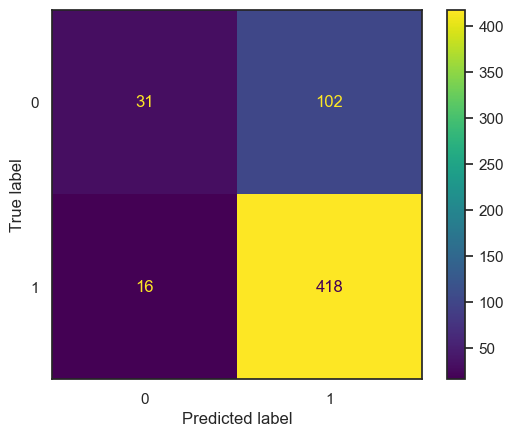

In [32]:
cm_train = confusion_matrix(y_train, yp_train,labels=model_op.classes_)
cm_test = confusion_matrix(y_test, yp_test,labels=model_op.classes_)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot()

In [33]:
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO
from IPython.display import Image 

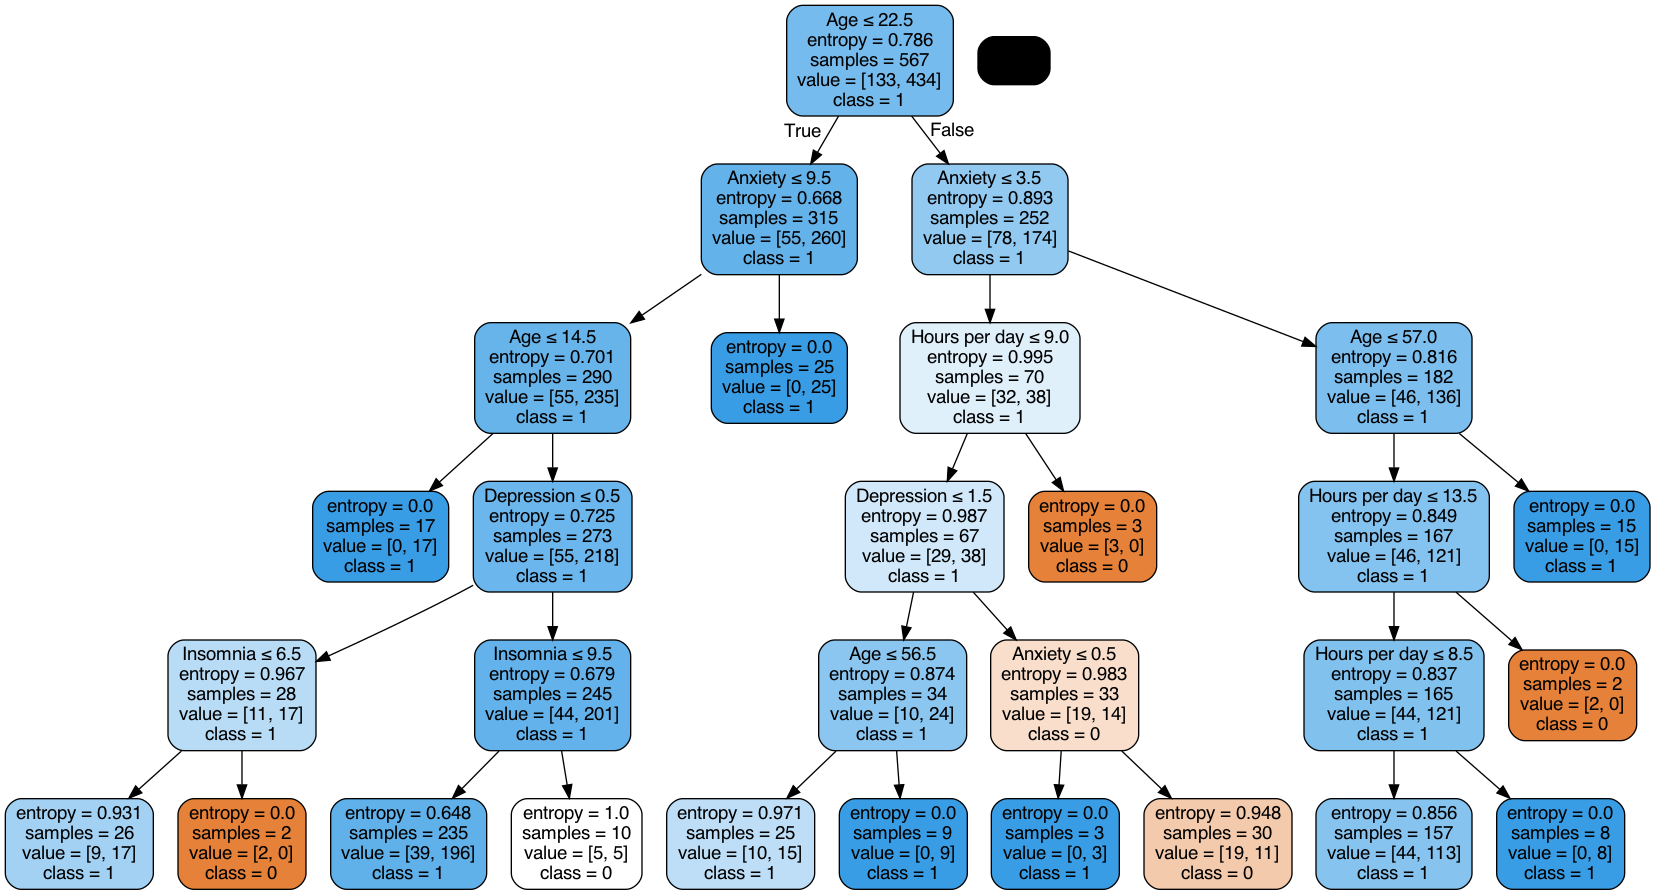

In [34]:
#second decision tree visualization
dot_data = StringIO()
export_graphviz(model_op, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = x.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('music effect1.png')
Image(graph.create_png())
#much clearer decision tree and outcome indicators

Decision tree classifier is popular in the medical field, where it's implemented to explore potential medicines. It's also popular in the business field, where analysts use it to evaluate sentiments based on numerous factors. In this case, the optimized tree has an accuracy rate of 75%. This model could be used in a therapeutical setting, where specialists evaluate whether to suggest patients use music as a therapeutic approach based on their own mental health survey.